In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
url_data = pd.read_csv("Phishing_URL_Dataset.csv")
url_data

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [55]:
url_data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [56]:
url_data.shape

(235795, 56)

In [57]:
print("Dataset Info:")
print(url_data.info())
print("\nMissing Values:")
print(url_data.isnull().sum())
print("\nSummary Statistics:")
print(url_data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  

In [58]:
url_data['label'] = url_data['label'].astype(int)

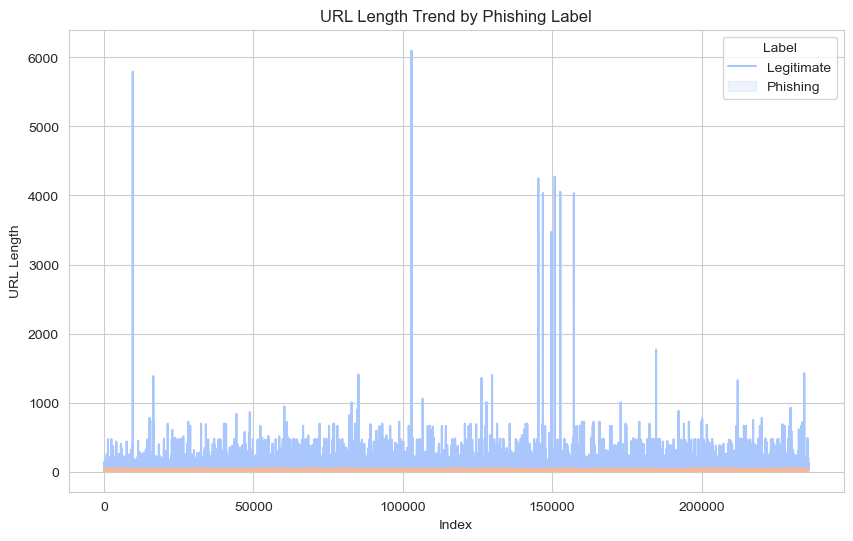

In [59]:
# Line plot: URLLength trend over index by Label
plt.figure(figsize=(10, 6))
sns.lineplot(x=url_data.index, y='URLLength', hue='label', data=url_data, palette='coolwarm', style='label')
plt.title('URL Length Trend by Phishing Label')
plt.xlabel('Index')
plt.ylabel('URL Length')
plt.legend(title='Label', labels=['Legitimate', 'Phishing'])
plt.savefig('url_length_trend.png')
plt.show()


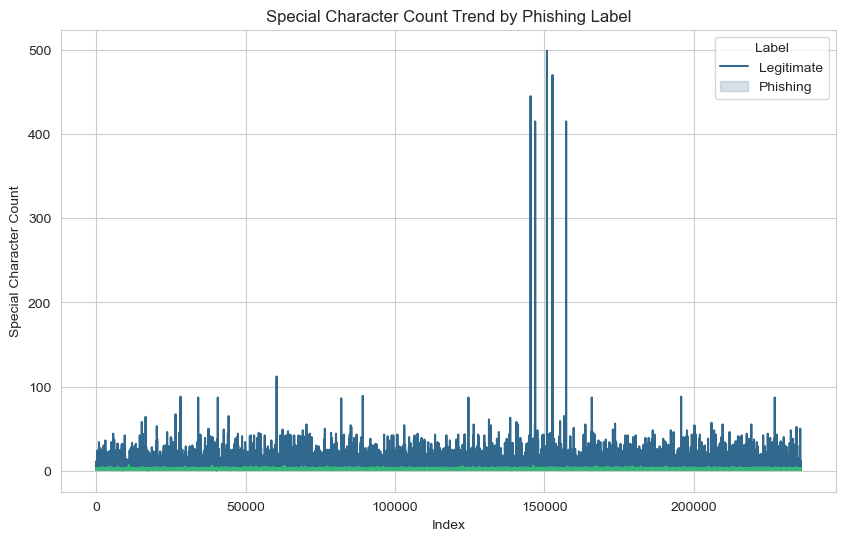

In [60]:

# Line plot: SpecialCharCount trend over index by Label
plt.figure(figsize=(10, 6))
sns.lineplot(x=url_data.index, y='NoOfOtherSpecialCharsInURL', hue='label', data=url_data, palette='viridis', style='label')
plt.title('Special Character Count Trend by Phishing Label')
plt.xlabel('Index')
plt.ylabel('Special Character Count')
plt.legend(title='Label', labels=['Legitimate', 'Phishing'])
plt.savefig('special_char_trend.png')
plt.show()

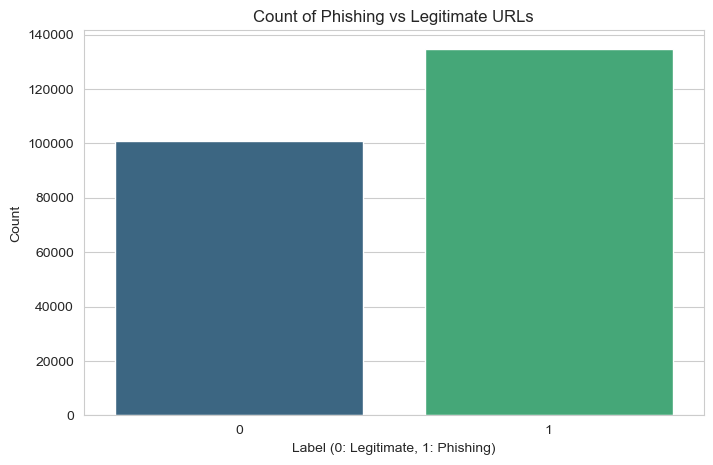

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=url_data, hue='label', palette='viridis', legend=False)
plt.title('Count of Phishing vs Legitimate URLs')
plt.xlabel('Label (0: Legitimate, 1: Phishing)')
plt.ylabel('Count')
plt.savefig('phishing_count.png')
plt.show()

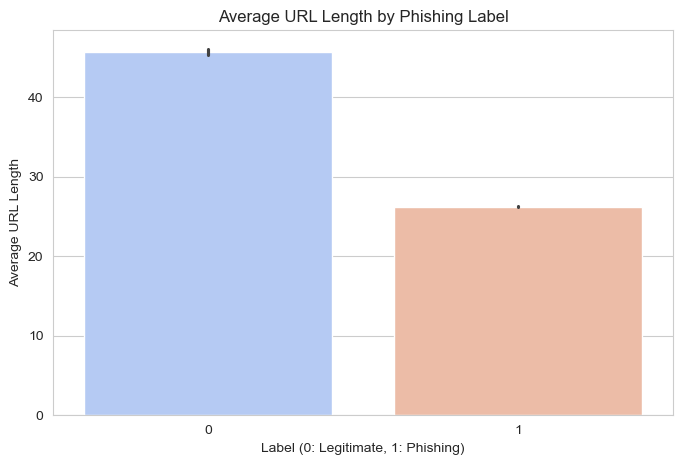

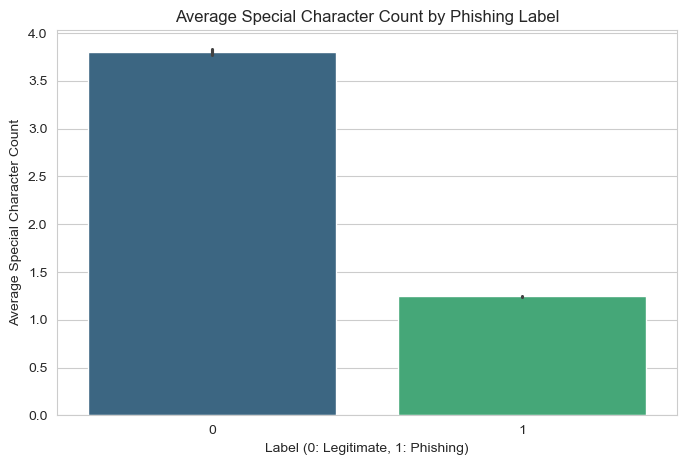

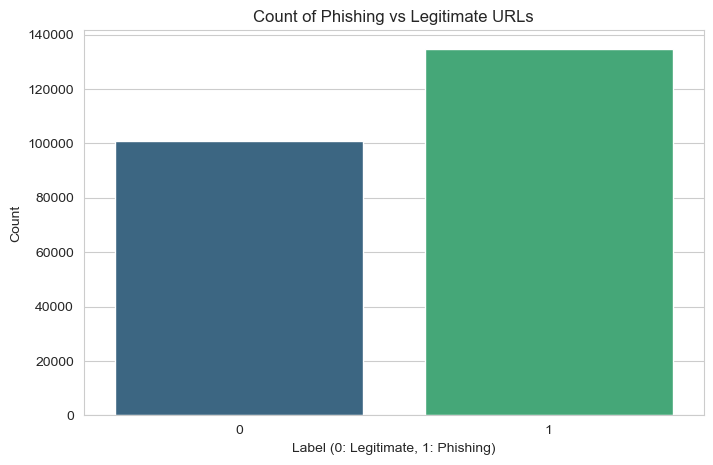

In [62]:

# Bar plot: Mean URLLength by Label
plt.figure(figsize=(8, 5))
sns.barplot(x='label', y='URLLength', data=url_data, hue='label', palette='coolwarm', legend=False, estimator=np.mean)
plt.title('Average URL Length by Phishing Label')
plt.xlabel('Label (0: Legitimate, 1: Phishing)')
plt.ylabel('Average URL Length')
plt.savefig('avg_url_length_barplot.png')
plt.show()

# Bar plot: Mean SpecialCharCount by Label
plt.figure(figsize=(8, 5))
sns.barplot(x='label', y='NoOfOtherSpecialCharsInURL', data=url_data, hue='label', palette='viridis', legend=False, estimator=np.mean)
plt.title('Average Special Character Count by Phishing Label')
plt.xlabel('Label (0: Legitimate, 1: Phishing)')
plt.ylabel('Average Special Character Count')
plt.savefig('avg_special_char_barplot.png')
plt.show()

# Bar plot: Count of phishing vs legitimate URLs
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=url_data, hue='label', palette='viridis', legend=False)
plt.title('Count of Phishing vs Legitimate URLs')
plt.xlabel('Label (0: Legitimate, 1: Phishing)')
plt.ylabel('Count')
plt.savefig('phishing_count.png')
plt.show()

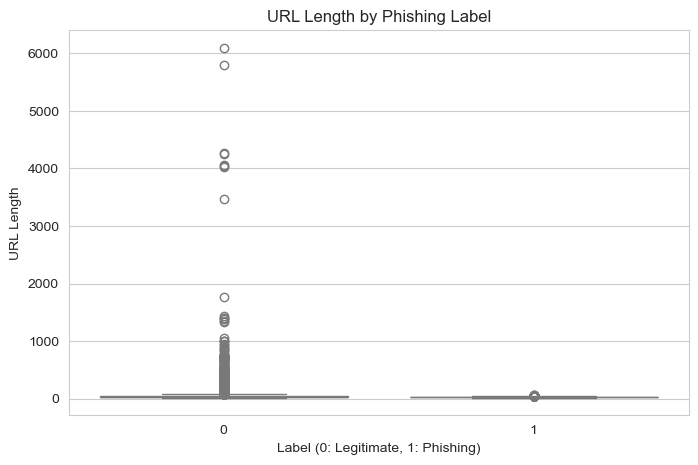

In [63]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='URLLength', data=url_data, hue='label', palette='coolwarm', legend=False)
plt.title('URL Length by Phishing Label')
plt.xlabel('Label (0: Legitimate, 1: Phishing)')
plt.ylabel('URL Length')
plt.savefig('url_length_boxplot.png')
plt.show()

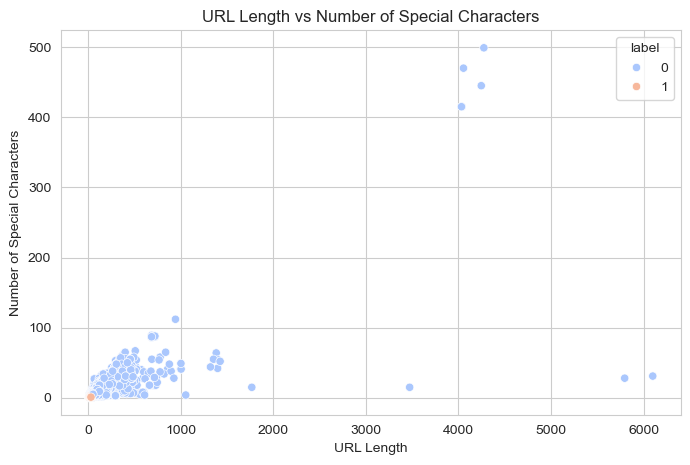

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='URLLength', y='NoOfOtherSpecialCharsInURL', data=url_data, hue='label', palette='coolwarm')
plt.title('URL Length vs Number of Special Characters')
plt.xlabel('URL Length')
plt.ylabel('Number of Special Characters')
plt.savefig('url_length_vs_specials.png')
plt.show()

In [65]:
plt.figure(figsize=(10, 8))
corr_matrix = url_data.select_dtypes(include=[np.number]).corr() 
key_features = ['URLLength', 'NoOfOtherSpecialCharsInURL', 'DomainLength', 'IsHTTPS', 'label']

<Figure size 1000x800 with 0 Axes>

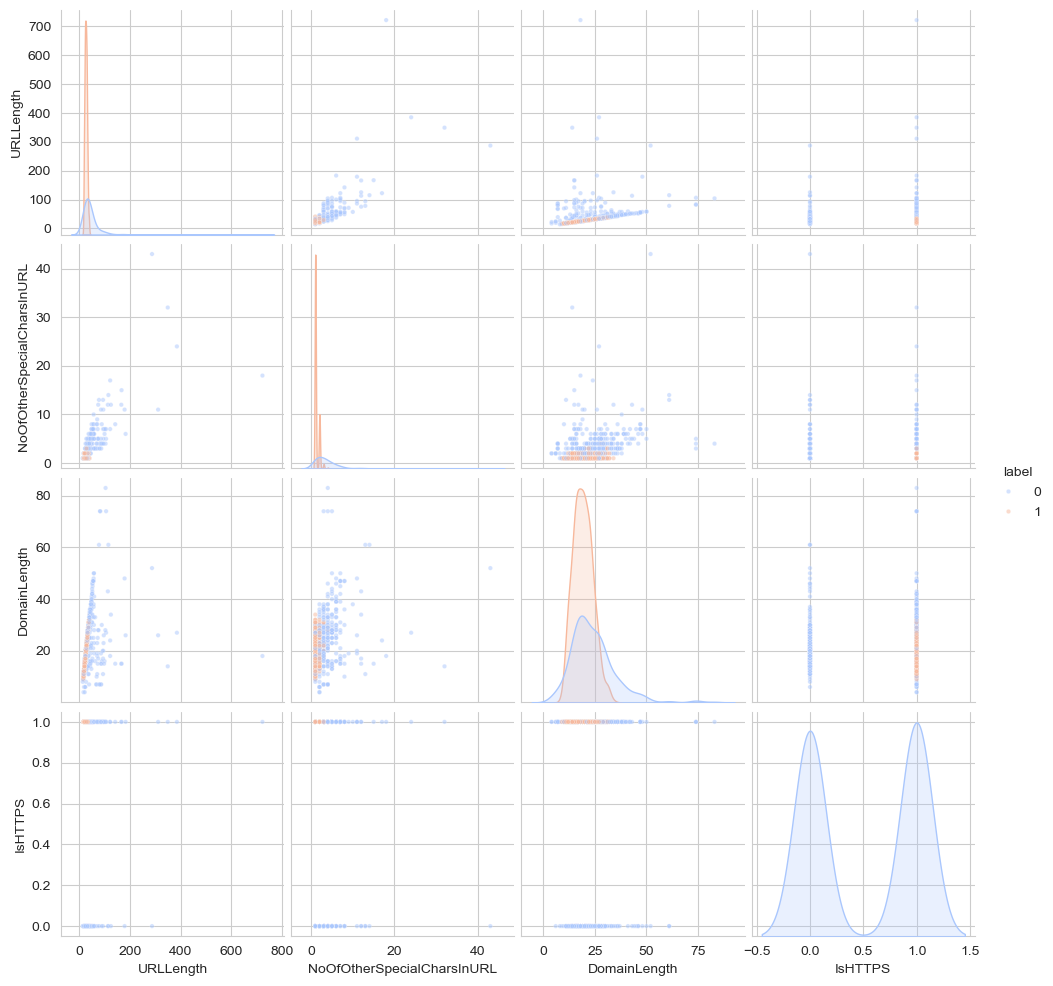

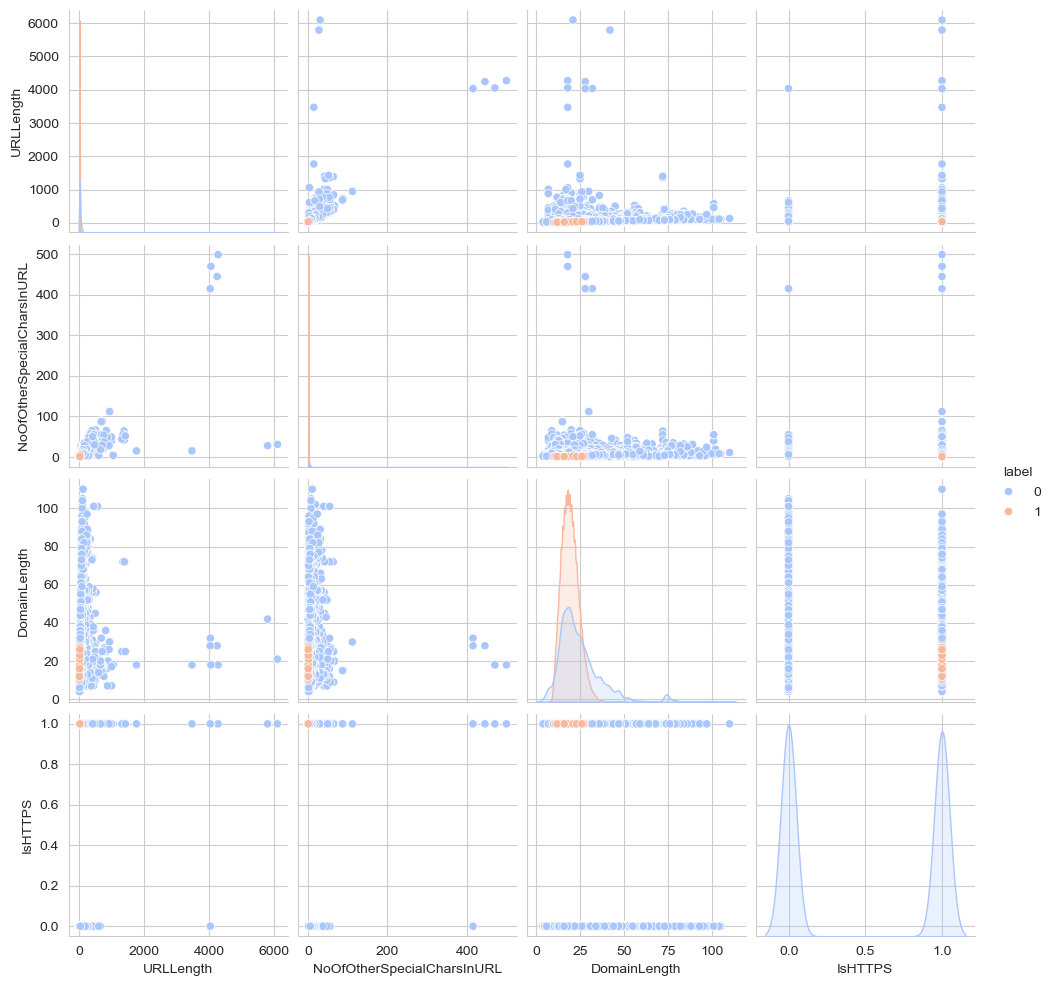

In [66]:
sampled_data = url_data[key_features].sample(n=1000, random_state=42)
sns.pairplot(sampled_data, hue='label', palette='coolwarm',plot_kws={'s': 10, 'alpha': 0.5})

sns.pairplot(url_data[key_features], hue='label', palette='coolwarm')
plt.savefig('pairplot_features.png')
plt.show()

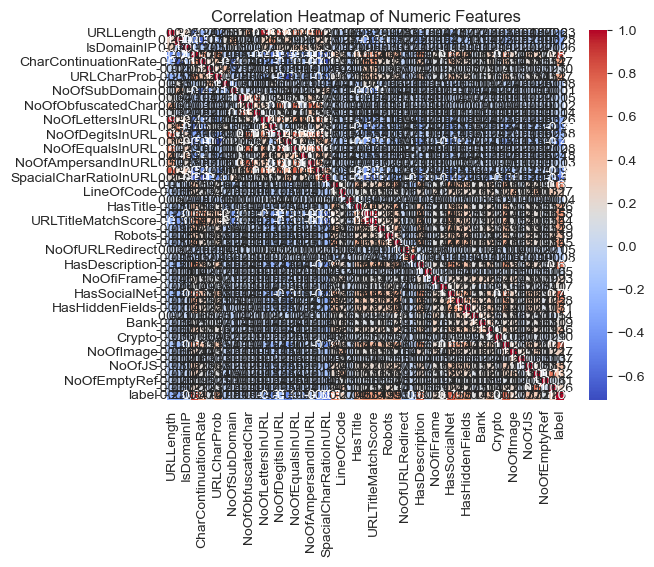

In [67]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.savefig('correlation_heatmap.png')
plt.show()

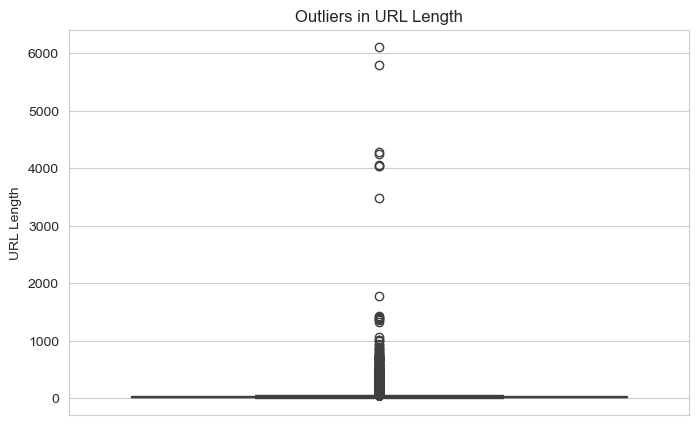

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=url_data['URLLength'])
plt.title('Outliers in URL Length')
plt.ylabel('URL Length')
plt.savefig('url_length_outliers.png')
plt.show()

In [69]:
Q1 = url_data['URLLength'].quantile(0.25)
Q3 = url_data['URLLength'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = url_data[(url_data['URLLength'] < lower_bound) | (url_data['URLLength'] > upper_bound)]
print(f'Number of outliers detected in URL Length (IQR): {len(outliers)}')


Number of outliers detected in URL Length (IQR): 22493


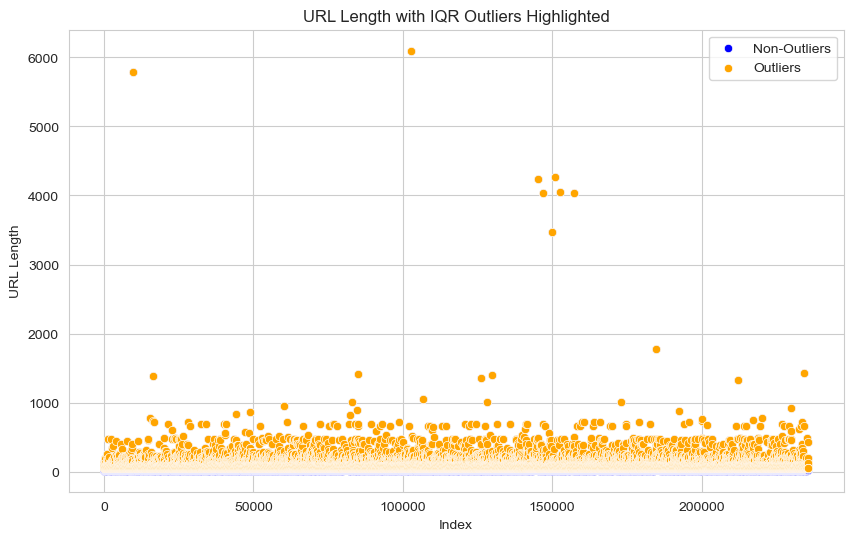

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=url_data, x=url_data.index, y='URLLength', label='Non-Outliers', color='blue')
sns.scatterplot(data=outliers, x=outliers.index, y='URLLength', label='Outliers', color='orange')
plt.title('URL Length with IQR Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('URL Length')
plt.legend()
plt.savefig('iqr_outlier_scatterplot.png')
plt.show()

In [71]:
from scipy.stats import zscore

Number of outliers detected in URL Length (Z-Score): 2198


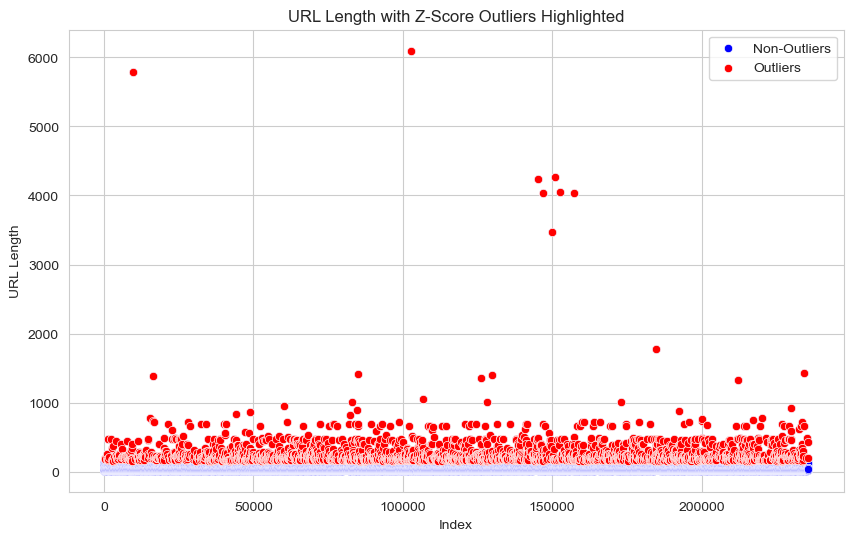

In [72]:

# Compute Z-score outliers for URLLength
url_data['Z_Score'] = (url_data['URLLength'] - url_data['URLLength'].mean()) / url_data['URLLength'].std()
outliers = url_data[url_data['Z_Score'].abs() > 3]
print(f'Number of outliers detected in URL Length (Z-Score): {len(outliers)}')
# Visualization of Z-Score Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=url_data, x=url_data.index, y='URLLength', label='Non-Outliers', color='blue')
sns.scatterplot(data=outliers, x=outliers.index, y='URLLength', label='Outliers', color='red')
plt.title('URL Length with Z-Score Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('URL Length')
plt.legend()
plt.savefig('zscore_outlier_scatterplot.png')
plt.show()


In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
url_data = url_data.drop(columns=['Z_Score'])

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree


In [76]:
print("Dataset Head:")
print(url_data.head(3))
print("\nData Types:")
print(url_data.dtypes)

Dataset Head:
     FILENAME                               URL  URLLength  \
0  521848.txt  https://www.southbankmosaics.com         31   
1   31372.txt          https://www.uni-mainz.de         23   
2  597387.txt    https://www.voicefmradio.co.uk         29   

                     Domain  DomainLength  IsDomainIP  TLD  \
0  www.southbankmosaics.com            24           0  com   
1          www.uni-mainz.de            16           0   de   
2    www.voicefmradio.co.uk            22           0   uk   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667           0.032650  ...    0   
2               100.0              0.866667           0.028555  ...    0   

   Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  \
0       0                 1         34       20      28          119   
1       0                 1         50 

In [77]:
X = url_data.drop(columns=['URLLength', 'FILENAME', 'URL', 'Domain', 'Title'])



In [78]:
from sklearn.preprocessing import LabelEncoder

X['TLD'] = LabelEncoder().fit_transform(url_data['TLD'])


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define target and features
y = url_data['URLLength']
X = url_data.drop(columns=['URLLength', 'FILENAME', 'URL', 'Domain', 'Title'])
X['TLD'] = LabelEncoder().fit_transform(url_data['TLD'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [80]:
print(X_train.dtypes)


DomainLength                    int64
IsDomainIP                      int64
TLD                             int32
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode                      int64
LargestLineLength               int64
HasTitle                        int64
DomainTitleMatchScore         float64
URLTitleMatc

In [81]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error


Lasso Regression:
MAE: 0.73
RMSE: 1.66
R² Score: 99.9
Metrics DataFrame:
     Metric     Value
0  R2 Score  0.998981
1      RMSE  1.659881
2       MAE  0.726537


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


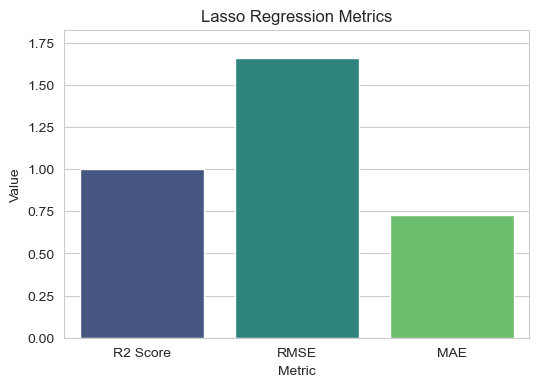

In [82]:
print("\nLasso Regression:")
reg_lasso = Lasso()
reg_lasso.fit(X_train, y_train)
y_pred_lasso = reg_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"MAE: {round(mae_lasso, 2)}")
print(f"RMSE: {round(rmse_lasso, 2)}")
print(f"R² Score: {round(r2_lasso*100, 2)}")
metrics_lasso = pd.DataFrame({
    'Metric': ['R2 Score', 'RMSE', 'MAE'],
    'Value': [r2_lasso, rmse_lasso, mae_lasso]
})
print("Metrics DataFrame:")
print(metrics_lasso)
plt.figure(figsize=(6, 4))
sns.barplot(data=metrics_lasso, x='Metric', y='Value', hue='Metric', palette='viridis')
plt.title('Lasso Regression Metrics')
plt.ylabel('Value')
plt.ylim(0, max(r2_lasso, rmse_lasso, mae_lasso, 1) * 1.1)
plt.savefig('lasso_regression_metrics_barplot.png')
plt.show()


Linear Regression:
MAE: 0.45
RMSE: 0.78
R² Score: 99.98
Metrics DataFrame:
     Metric     Value
0  R2 Score  0.999775
1      RMSE  0.779941
2       MAE  0.449562


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


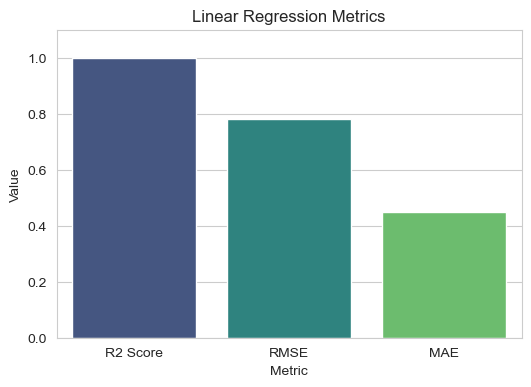

In [83]:
print("\nLinear Regression:")
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)
y_pred_lr = reg_lr.predict(X_test)


r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"MAE: {round(mae_lr, 2)}")
print(f"RMSE: {round(rmse_lr, 2)}")
print(f"R² Score: {round(r2_lr*100, 2)}")
metrics_lr = pd.DataFrame({
    'Metric': ['R2 Score', 'RMSE', 'MAE'],
    'Value': [r2_lr, rmse_lr, mae_lr]
})
print("Metrics DataFrame:")
print(metrics_lr)
plt.figure(figsize=(6, 4))
sns.barplot(data=metrics_lr, x='Metric', y='Value', hue='Metric', palette='viridis')
plt.title('Linear Regression Metrics')
plt.ylabel('Value')
plt.ylim(0, max(r2_lr, rmse_lr, mae_lr, 1) * 1.1)
plt.savefig('linear_regression_metrics_barplot.png')
plt.show()




Random Forest Regressor:
MAE: 0.12
RMSE: 7.81
R² Score: 97.74
Metrics DataFrame:
     Metric     Value
0  R2 Score  0.977434
1      RMSE  7.809485
2       MAE  0.124280


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


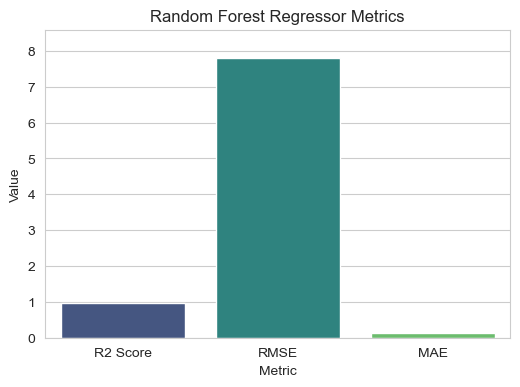

In [84]:
print("\nRandom Forest Regressor:")
reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)
reg_rf.fit(X_train, y_train)
y_pred_rf = reg_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"MAE: {round(mae_rf, 2)}")
print(f"RMSE: {round(rmse_rf, 2)}")
print(f"R² Score: {round(r2_rf*100, 2)}")
metrics_rf = pd.DataFrame({
    'Metric': ['R2 Score', 'RMSE', 'MAE'],
    'Value': [r2_rf, rmse_rf, mae_rf]
})
print("Metrics DataFrame:")
print(metrics_rf)
plt.figure(figsize=(6, 4))
sns.barplot(data=metrics_rf, x='Metric', y='Value', hue='Metric', palette='viridis')
plt.title('Random Forest Regressor Metrics')
plt.ylabel('Value')
plt.ylim(0, max(r2_rf, rmse_rf, mae_rf, 1) * 1.1)
plt.savefig('random_forest_regressor_metrics_barplot.png')
plt.show()


Decision Tree Regressor:
MAE: 5.14
RMSE: 19.22
R² Score: 86.33
Metrics DataFrame:
     Metric      Value
0  R2 Score   0.863276
1      RMSE  19.222677
2       MAE   5.144123


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


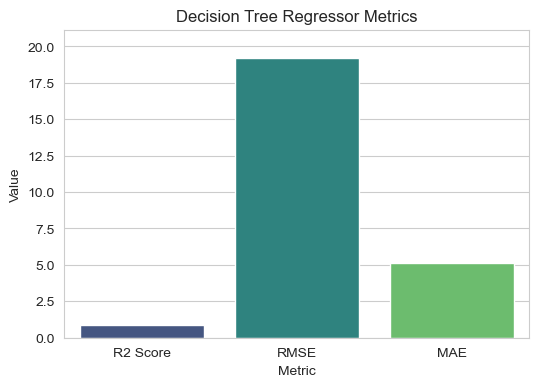

In [85]:
print("\nDecision Tree Regressor:")
reg_dt = DecisionTreeRegressor(max_depth=3, random_state=42)
reg_dt.fit(X_train, y_train)
y_pred_dt = reg_dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"MAE: {round(mae_dt, 2)}")
print(f"RMSE: {round(rmse_dt, 2)}")
print(f"R² Score: {round(r2_dt*100, 2)}")
metrics_dt = pd.DataFrame({
    'Metric': ['R2 Score', 'RMSE', 'MAE'],
    'Value': [r2_dt, rmse_dt, mae_dt]
})
print("Metrics DataFrame:")
print(metrics_dt)
plt.figure(figsize=(6, 4))
sns.barplot(data=metrics_dt, x='Metric', y='Value', hue='Metric', palette='viridis')
plt.title('Decision Tree Regressor Metrics')
plt.ylabel('Value')
plt.ylim(0, max(r2_dt, rmse_dt, mae_dt, 1) * 1.1)
plt.savefig('decision_tree_regressor_metrics_barplot.png')
plt.show()


KNN Regressor:
MAE: 2.03
RMSE: 21.79
R² Score: 82.43
Metrics DataFrame:
     Metric      Value
0  R2 Score   0.824286
1      RMSE  21.791884
2       MAE   2.027575


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


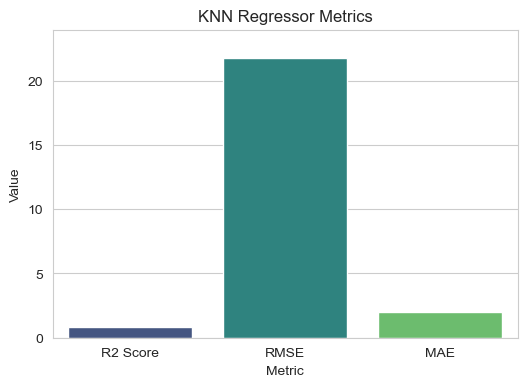

In [86]:
print("\nKNN Regressor:")
reg_knn = KNeighborsRegressor(n_neighbors=5)
reg_knn.fit(X_train_scaled, y_train)
y_pred_knn = reg_knn.predict(X_test_scaled)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"MAE: {round(mae_knn, 2)}")
print(f"RMSE: {round(rmse_knn, 2)}")
print(f"R² Score: {round(r2_knn*100, 2)}")
metrics_knn = pd.DataFrame({
    'Metric': ['R2 Score', 'RMSE', 'MAE'],
    'Value': [r2_knn, rmse_knn, mae_knn]
})
print("Metrics DataFrame:")
print(metrics_knn)
plt.figure(figsize=(6, 4))
sns.barplot(data=metrics_knn, x='Metric', y='Value', hue='Metric', palette='viridis')
plt.title('KNN Regressor Metrics')
plt.ylabel('Value')
plt.ylim(0, max(r2_knn, rmse_knn, mae_knn, 1) * 1.1)
plt.savefig('knn_regressor_metrics_barplot.png')
plt.show()


Ridge Regression:
MAE: 0.45
RMSE: 0.78
R² Score: 99.98
Metrics DataFrame:
     Metric     Value
0  R2 Score  0.999775
1      RMSE  0.779719
2       MAE  0.448753


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


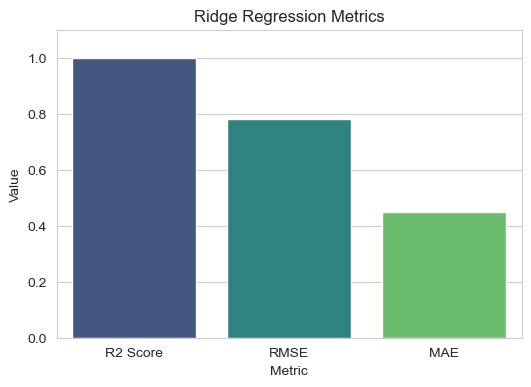

In [87]:
print("\nRidge Regression:")
reg_ridge = Ridge()
reg_ridge.fit(X_train, y_train)
y_pred_ridge = reg_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"MAE: {round(mae_ridge, 2)}")
print(f"RMSE: {round(rmse_ridge, 2)}")
print(f"R² Score: {round(r2_ridge*100, 2)}")
metrics_ridge = pd.DataFrame({
    'Metric': ['R2 Score', 'RMSE', 'MAE'],
    'Value': [r2_ridge, rmse_ridge, mae_ridge]
})
print("Metrics DataFrame:")
print(metrics_ridge)
plt.figure(figsize=(6, 4))
sns.barplot(data=metrics_ridge, x='Metric', y='Value', hue='Metric', palette='viridis')
plt.title('Ridge Regression Metrics')
plt.ylabel('Value')
plt.ylim(0, max(r2_ridge, rmse_ridge, mae_ridge, 1) * 1.1)
plt.savefig('ridge_regression_metrics_barplot.png')
plt.show()

In [88]:
print(X_train_scaled.shape)


(188636, 51)


In [89]:
# Create a sample of your dataset (adjust size as needed)
url_data_sample = url_data.sample(n=10000, random_state=42)

X = url_data_sample.drop(columns=['URLLength'])  # Drop target
X = X.select_dtypes(include=['number'])          # Keep only numeric features
y = url_data_sample['URLLength']


In [90]:

#  train/test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [91]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [92]:
# SVR Regression (Using 10000 training samples)
print("\nSVR Regression (10000 training samples):")
X_sample = X_train_scaled[:10000]
y_sample = y_train[:10000]
svr_model = SVR()
svr_model.fit(X_sample, y_sample)
svr_preds = svr_model.predict(X_test_scaled)
svr_rmse = mean_squared_error(y_test, svr_preds, squared=False)
svr_mae = mean_absolute_error(y_test, svr_preds)
print("Mean Absolute Error (MAE):", round(svr_mae, 2))
print("Root Mean Squared Error (RMSE):", round(svr_rmse, 2))
svr_r2 = r2_score(y_test, svr_preds)
print("R² Score (SVR):", round(svr_r2 * 100))



SVR Regression (10000 training samples):
Mean Absolute Error (MAE): 3.12
Root Mean Squared Error (RMSE): 17.19
R² Score (SVR): 49


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



SVR Metrics DataFrame:
     Metric      Value
0  R2 Score   0.493366
1      RMSE  17.187175
2       MAE   3.119687


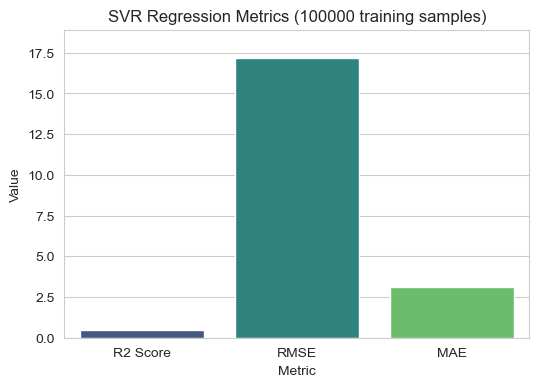

In [93]:
# Create DataFrame for SVR metrics
metrics_svr = pd.DataFrame({
    'Metric': ['R2 Score', 'RMSE', 'MAE'],
    'Value': [svr_r2, svr_rmse, svr_mae]
})
print("\nSVR Metrics DataFrame:")
print(metrics_svr)

# Visualize SVR metrics
plt.figure(figsize=(6, 4))
sns.barplot(data=metrics_svr, x='Metric', y='Value', hue='Metric', palette='viridis')
plt.title('SVR Regression Metrics (100000 training samples)')
plt.ylabel('Value')
plt.ylim(0, max(svr_r2, svr_rmse, svr_mae, 1) * 1.1)
plt.savefig('svr_metrics_barplot.png')
plt.show()


In [43]:
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [44]:
# Regression models
models = {
    'Lasso': Lasso(alpha=1.0, random_state=42),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Classification models
clf_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVC': SVC(kernel='rbf', random_state=42)
}


In [45]:

# Regression metrics
metrics = {'Model': [], 'R2 Score': [], 'RMSE': [], 'MAE': []}
for name, model in models.items():
    # Use scaled data for Lasso, Ridge, SVR, KNN
    if name in ['Lasso', 'Ridge', 'SVR', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    metrics['Model'].append(name)
    metrics['R2 Score'].append(r2)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)

# Classification accuracies
clf_metrics = {'Model': [], 'Accuracy': []}
for name, model in clf_models.items():
    # Use scaled data for all classification models
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    clf_metrics['Model'].append(name)
    clf_metrics['Accuracy'].append(accuracy)



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Regression Metrics DataFrame:
           Model  R2 Score       RMSE       MAE
1          Ridge  0.998842   0.821641  0.445456
5  Random Forest  0.996413   1.446225  0.317290
0          Lasso  0.994624   1.770434  0.986724
3  Decision Tree  0.991930   2.169216  0.458500
4            KNN  0.918724   6.883968  3.304900
2            SVR  0.493366  17.187175  3.119687

Classification Accuracy DataFrame:
                 Model  Accuracy
3        Random Forest    0.8165
2        Decision Tree    0.3425
0  Logistic Regression    0.3305
4                  SVC    0.2475
1                  KNN    0.1385


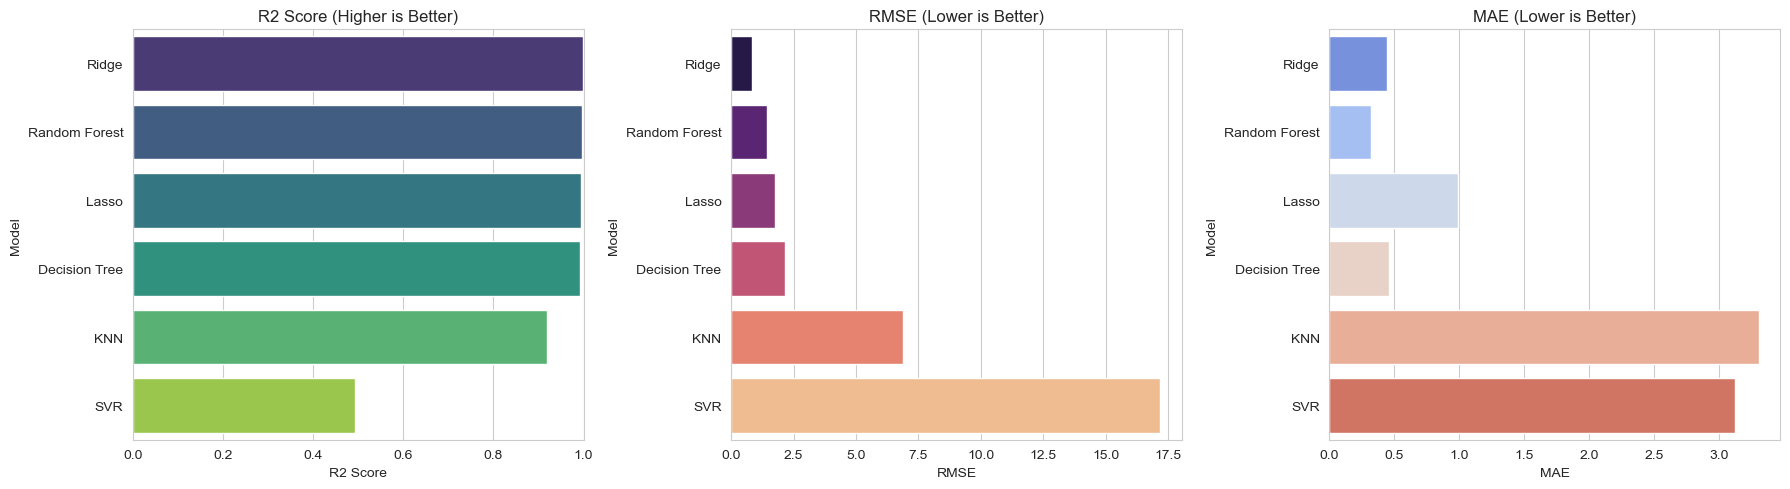

In [46]:

# Create DataFrames
metrics_phishing = pd.DataFrame(metrics).sort_values(by='R2 Score', ascending=False)
ac_phishing = pd.DataFrame(clf_metrics).sort_values(by='Accuracy', ascending=False)

# Print DataFrames
print("\nRegression Metrics DataFrame:")
print(metrics_phishing)
print("\nClassification Accuracy DataFrame:")
print(ac_phishing)

# Visualize regression metrics
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=metrics_phishing, x="R2 Score", y="Model", hue="Model", palette="viridis", legend=False)
plt.title("R2 Score (Higher is Better)")
plt.xlim(0, 1)

plt.subplot(1, 3, 2)
sns.barplot(data=metrics_phishing, x="RMSE", y="Model", hue="Model", palette="magma", legend=False)
plt.title("RMSE (Lower is Better)")

plt.subplot(1, 3, 3)
sns.barplot(data=metrics_phishing, x="MAE", y="Model", hue="Model", palette="coolwarm", legend=False)
plt.title("MAE (Lower is Better)")

plt.tight_layout()
plt.savefig('regression_metrics_phishing.png')
plt.show()


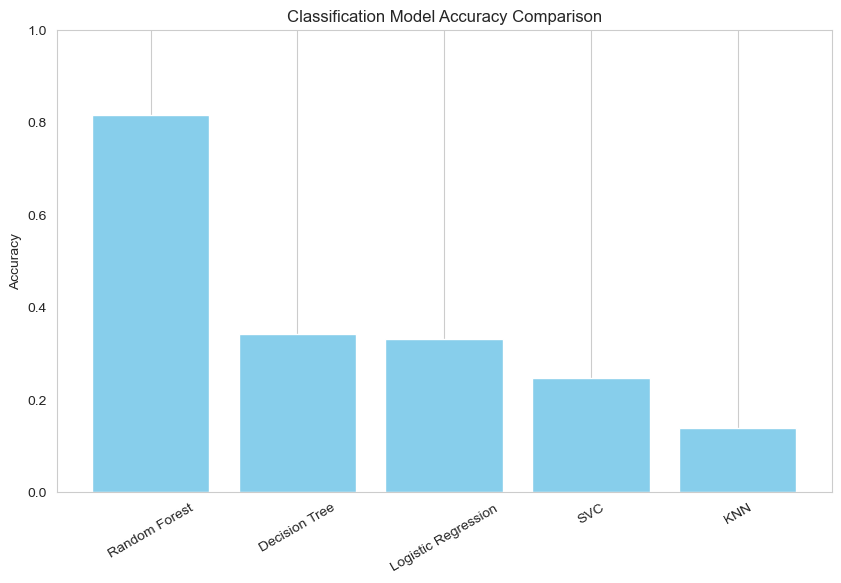

In [47]:
# Visualize classification accuracies
plt.figure(figsize=(10, 6))
plt.bar(ac_phishing['Model'], ac_phishing['Accuracy'], color='skyblue')
plt.title('Classification Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.savefig('classification_accuracy_phishing.png')
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score


In [49]:
print(url_data.head())
print("\nDataset Info:")
print(url_data.info())
print("\nLabel Distribution:")
print(url_data['label'].value_counts())

     FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667           0.032650  ...    0   
2 

In [234]:
# Convert URLSimilarityIndex into three classes using quantiles
# Compute the quantile bins first
bins = pd.qcut(url_data['URLSimilarityIndex'], q=3, duplicates='drop')

# Get the number of unique bins
num_bins = bins.cat.categories.size

# Define matching labels
labels = ['Low', 'Medium', 'High'][:num_bins]

# Apply qcut again with correct labels
url_data['similarity_class'] = pd.qcut(
    url_data['URLSimilarityIndex'],
    q=3,
    labels=labels,
    duplicates='drop'
)

# Check distribution
print("\nDistribution of similarity_class:")
print(url_data['similarity_class'].value_counts())



Distribution of similarity_class:
similarity_class
Medium    157197
Low        78598
Name: count, dtype: int64


In [238]:

exclude_cols = ['FILENAME', 'URL', 'Domain', 'TLD', 'label', 'URLLength']  # remove 'length_class'
X = url_data.drop(columns=exclude_cols, errors='ignore')
y = url_data['label']  # or whatever your actual target column is


In [240]:
print("\nFirst 2 rows of X:")
print(X.head(2))
print("\nFirst 2 rows of y:")
print(y.head(2))



First 2 rows of X:
   DomainLength  IsDomainIP  URLSimilarityIndex  CharContinuationRate  \
0            24           0               100.0              1.000000   
1            16           0               100.0              0.666667   

   TLDLegitimateProb  URLCharProb  TLDLength  NoOfSubDomain  HasObfuscation  \
0           0.522907     0.061933          3              1               0   
1           0.032650     0.050207          2              1               0   

   NoOfObfuscatedChar  ...  Pay  Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  \
0                   0  ...    0       0                 1         34       20   
1                   0  ...    0       0                 1         50        9   

   NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  similarity_class  
0      28          119             0              124            Medium  
1       8           39             0              217            Medium  

[2 rows x 51 columns]

First 2 rows of y:
0    1
1    1

In [246]:

X = X.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Display scaled X_train

In [248]:
# Display scaled X_train
print("\nScaled X_train sample:")
print(X_train_scaled[:3])



Scaled X_train sample:
[[ 0.38486834 -0.05129333 -1.68536785 -0.33396462 -1.01035475  0.11667286
  -1.27862287  1.38456871 -0.04528206 -0.01397171 -0.03618748  0.06101127
   0.97451731 -0.07817407  0.01960777 -0.07103245 -0.15237417 -0.03116619
   0.19499542  0.85331012  0.52785232 -0.30084784 -0.07657116  0.40186379
  -1.00994379 -1.05118586 -0.75328226 -0.60205064 -1.28926606 -0.3921291
  -0.20376543 -0.88668334 -0.05482153 -0.26635756 -0.21397999 -0.91535611
  -0.84024815 -0.77821446 -0.33802001 -0.3811773  -0.55608155 -0.15430544
  -0.9727724  -0.32886244 -0.07621115 -0.44759238 -0.35051627 -0.12962933
  -0.28922247]
 [-0.92611413 -0.05129333 -0.35558301  0.71447171  1.04422495  0.31075162
   0.39586081 -0.27575895 -0.04528206 -0.01397171 -0.03618748 -0.53974942
  -2.04810988  0.01200501  1.07745216 -0.07103245 -0.15237417 -0.03116619
  -0.39474285 -0.31932506 -1.89446926 -0.36371212 -0.08207485 -2.48840532
  -1.00994379 -1.05118586 -0.75328226 -0.60205064 -1.28926606 -0.3921291
 

In [142]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = classifier.predict(X_test_scaled)

# Evaluate
cm = confusion_matrix(y_test, y_pred)
accuracy_log = accuracy_score(y_test, y_pred)
print("\nLogistic Regression Results:")
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_log)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Results:
Confusion Matrix:
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Accuracy Score: 0.3305

Classification Report:
               precision    recall  f1-score   support

          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         6
          17       0.50      0.48      0.49        21
          18       0.40      0.32      0.36        31
          19       0.38      0.42      0.40        67
          20       0.50      0.50      0.50        86
          21       0.49      0.46      0.47       102
          22       0.53      0.49      0.51       105
          23       0.43      0.42      0.43        95
          24       0.48      0.66      0.55       124
          25       0.39      0.37      0.38       115
          26       0.44      0.41      0.43       131
          27       0.41      0.54      0.46 

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

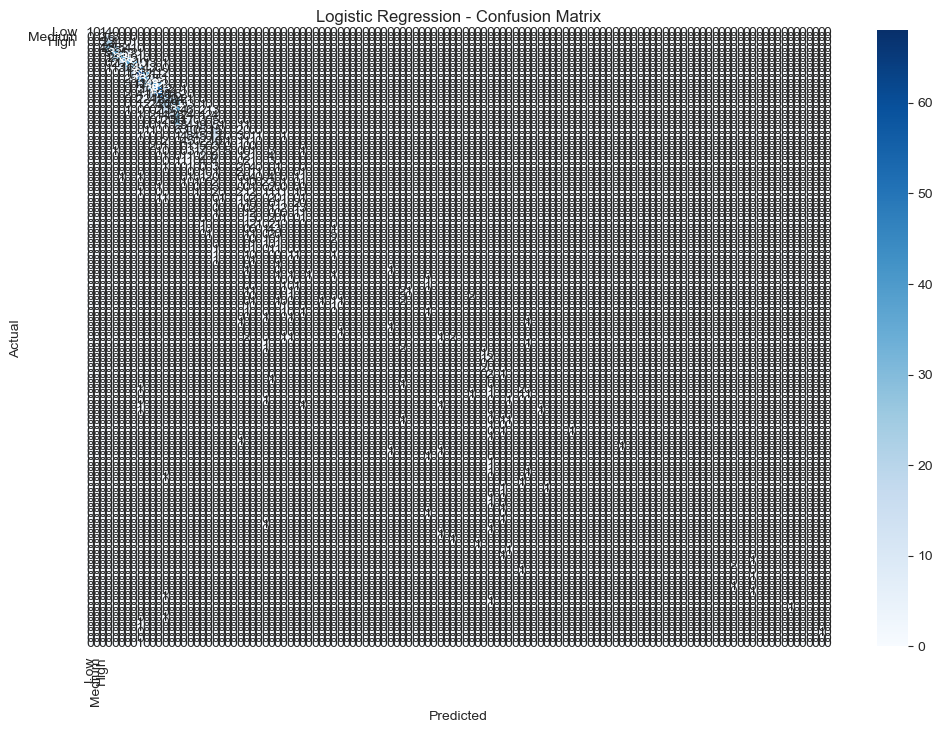

In [256]:
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


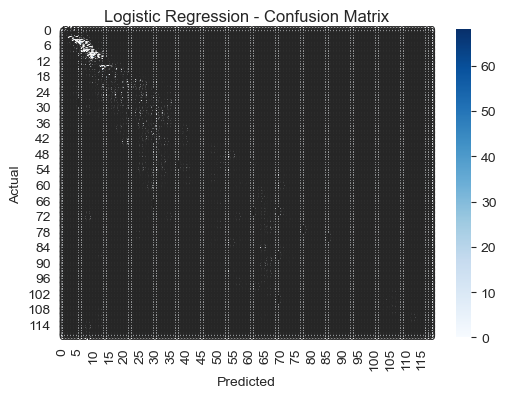

In [258]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [146]:
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(X_train_scaled, y_train)

# Predict
ky_pred = classifier.predict(X_test_scaled)

# Evaluate
cm = confusion_matrix(y_test, ky_pred)
accuracy_knn = accuracy_score(y_test, ky_pred)
print("\nKNN Classifier Results:")
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_knn)
print("\nClassification Report:\n", classification_report(y_test, ky_pred))


KNN Classifier Results:
Confusion Matrix:
 [[2 1 1 ... 0 0 0]
 [2 5 2 ... 0 0 0]
 [0 2 9 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Accuracy Score: 0.1385

Classification Report:
               precision    recall  f1-score   support

          16       0.40      0.33      0.36         6
          17       0.24      0.24      0.24        21
          18       0.18      0.29      0.23        31
          19       0.18      0.27      0.22        67
          20       0.16      0.20      0.17        86
          21       0.15      0.19      0.17       102
          22       0.11      0.15      0.12       105
          23       0.12      0.19      0.15        95
          24       0.14      0.21      0.17       124
          25       0.09      0.10      0.10       115
          26       0.20      0.18      0.19       131
          27       0.12      0.12      0.12       114
          28       0.11      0.07      0.08       116
          29       0.08      0.

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\s

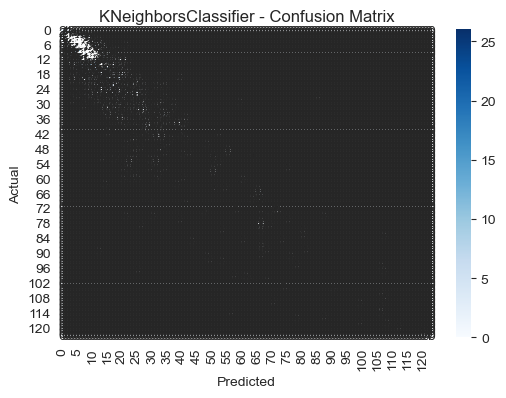

In [148]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("KNeighborsClassifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree Classifier Results:
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy Score: 0.3425

Classification Report:
               precision    recall  f1-score   support

          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00        21
          18       0.00      0.00      0.00        31
          19       0.00      0.00      0.00        67
          20       0.29      1.00      0.45        86
          21       0.00      0.00      0.00       102
          22       0.50      0.95      0.66       105
          23       0.00      0.00      0.00        95
          24       0.83      0.80      0.81       124
          25       0.57      0.85      0.68       115
          26       0.00      0.00      0.00       131
          27       0.41      0.75      0.53       114
          28       0.69      0.78      0.73       116
          29       0.

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


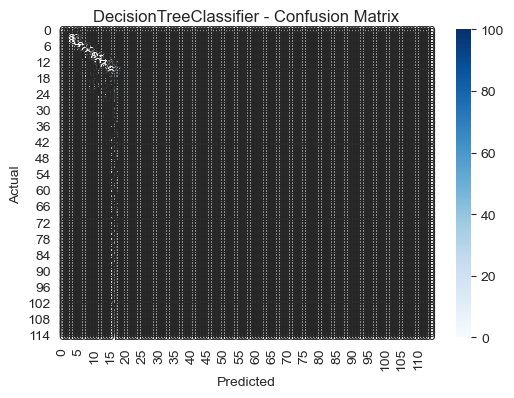

In [152]:
classifier = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
classifier.fit(X_train_scaled, y_train)

# Predict
dy_pred = classifier.predict(X_test_scaled)

# Evaluate
cm = confusion_matrix(y_test, dy_pred)
accuracy_dtree = accuracy_score(y_test, dy_pred)
print("\nDecision Tree Classifier Results:")
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_dtree)
print("\nClassification Report:\n", classification_report(y_test, dy_pred))




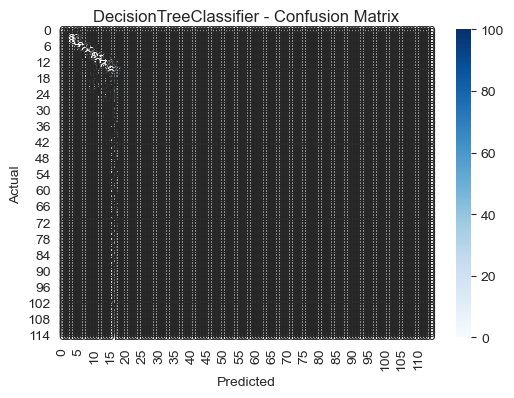

In [154]:
# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("DecisionTreeClassifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [158]:
unique_labels = np.unique(y_train)
print("Classes in training set:", unique_labels)


Classes in training set: [ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 120 121 122
 125 127 129 130 132 133 134 138 140 146 147 149 151 153 155 156 158 166
 167 170 172 174 178 183 185 186 187 196 204 205 208 211 213 214 215 225
 231 232 233 236 237 242 243 244 246 253 254 267 269 297 306 307 311 312
 350 379 385 387 390 427 460 463 464 469 475 495 663 695 722]


In [176]:
url_data = url_data[url_data['label'].isin([0, 1])]
unique_labels = np.unique(y)
class_map = {label: f"Class {label}" for label in unique_labels}
actual_class_names = [class_map[label] for label in unique_labels]


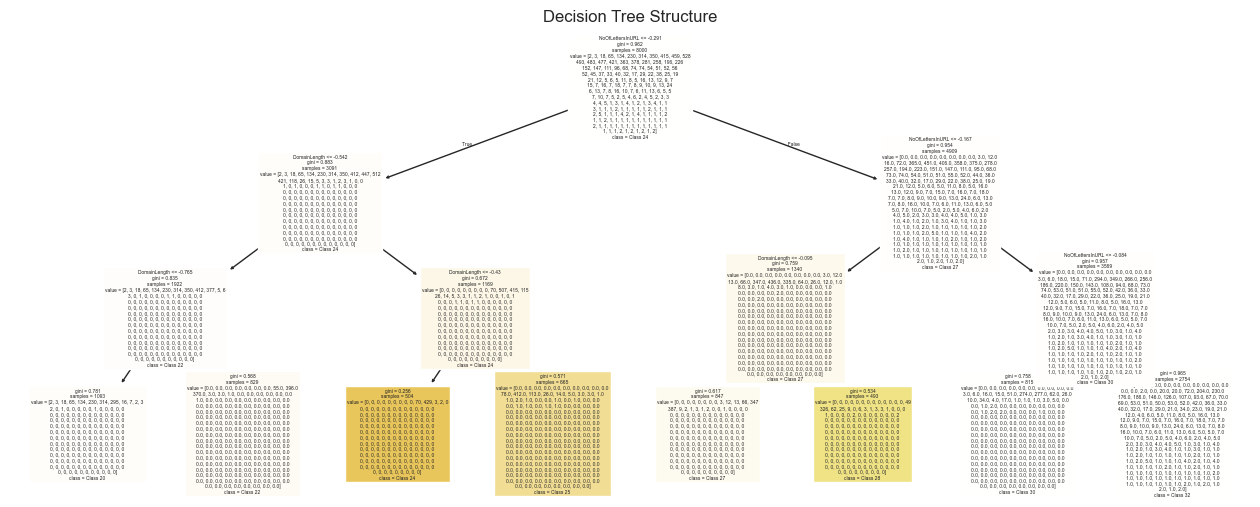

In [180]:

plt.figure(figsize=(16,6))
plot_tree(classifier, feature_names=X.columns, class_names=actual_class_names, filled=True)
plt.title("Decision Tree Structure")
plt.show()


In [188]:
from sklearn.preprocessing import LabelEncoder

# Get all unique class labels from your trained model
unique_labels = np.unique(classifier.classes_)

# Option 1: Generic class labels
class_names = [f"Class {label}" for label in unique_labels]

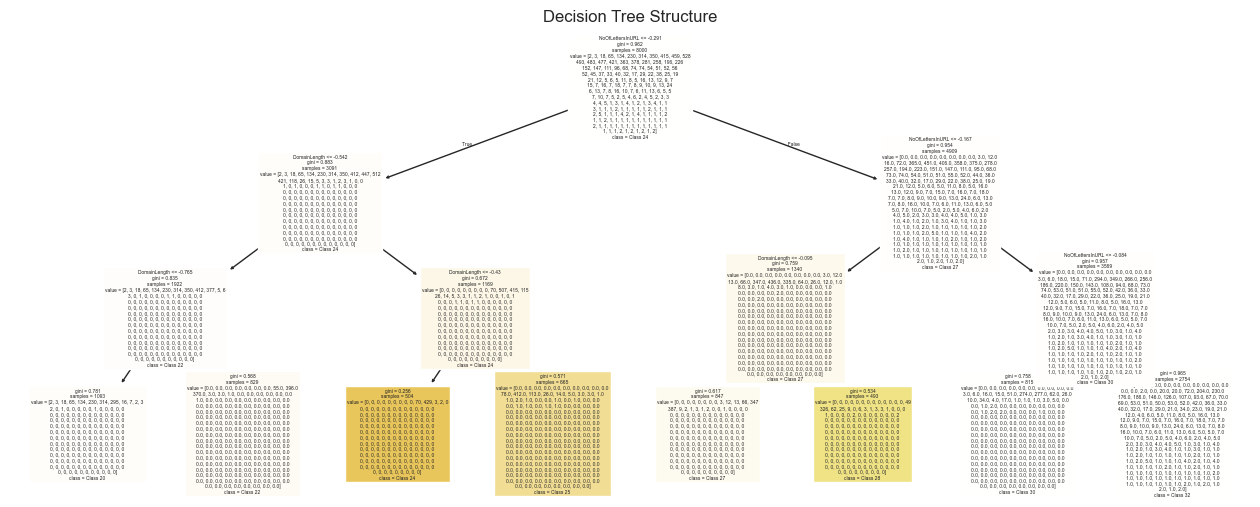

In [192]:
# Visualize decision tree
plt.figure(figsize=(16, 6))
plot_tree(classifier, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree Structure")
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Random Forest Classifier Results:
Cross Validation Accuracy Scores: [0.800625 0.800625 0.804375 0.8      0.81875 ]
Mean CV Accuracy: 0.804875
Confusion Matrix:
 [[ 2  4  0 ...  0  0  0]
 [ 1 19  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]]
Accuracy Score: 0.8165

Classification Report:
               precision    recall  f1-score   support

          16       0.67      0.33      0.44         6
          17       0.83      0.90      0.86        21
          18       1.00      1.00      1.00        31
          19       0.98      0.91      0.95        67
          20       0.90      0.99      0.94        86
          21       1.00      0.96      0.98       102
          22       0.99      0.95      0.97       105
          23       0.92      0.98      0.95        95
          24       0.99      0.97      0.98       124
          25       0.96      0.96      0.96       115
          26       0.90      0.97      

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\s

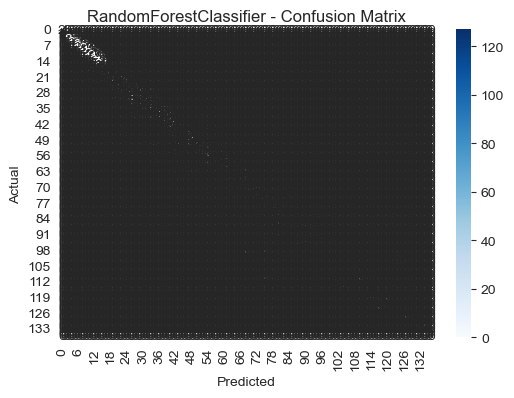

In [194]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring="accuracy")

# Train and predict
pipeline.fit(X_train, y_train)
ry_pred = pipeline.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, ry_pred)
cm = confusion_matrix(y_test, ry_pred)
print("\nRandom Forest Classifier Results:")
print("Cross Validation Accuracy Scores:", cv_score)
print("Mean CV Accuracy:", cv_score.mean())
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, ry_pred))

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("RandomForestClassifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [196]:
# Cell 8: SVC Classifier
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)

# Predict
sy_pred = svc.predict(X_test_scaled)

# Evaluate
accuracy_svc = accuracy_score(y_test, sy_pred)
cm = confusion_matrix(y_test, sy_pred)
print("\nSVC Results:")
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_svc)
print("\nClassification Report:\n", classification_report(y_test, sy_pred))


SVC Results:
Confusion Matrix:
 [[1 0 1 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy Score: 0.2475

Classification Report:
               precision    recall  f1-score   support

          16       1.00      0.17      0.29         6
          17       0.00      0.00      0.00        21
          18       0.30      0.10      0.15        31
          19       0.34      0.42      0.38        67
          20       0.39      0.43      0.41        86
          21       0.39      0.32      0.35       102
          22       0.33      0.35      0.34       105
          23       0.21      0.19      0.20        95
          24       0.33      0.55      0.41       124
          25       0.32      0.33      0.32       115
          26       0.35      0.37      0.36       131
          27       0.30      0.46      0.36       114
          28       0.18      0.17      0.18       116
          29       0.26      0.21      0.2

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\s

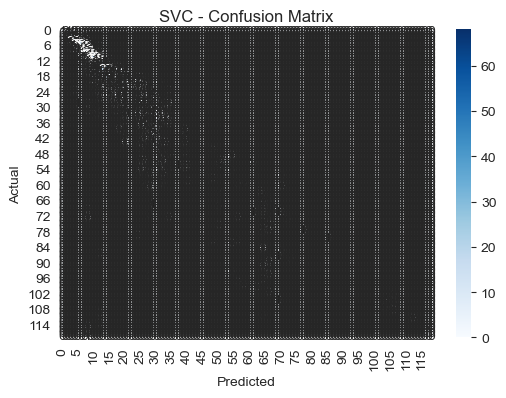

In [200]:
plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")

plt.title("SVC - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [202]:
#  Collect and Visualize Accuracies
ac_scores = {
    "Logistic Regression": accuracy_log,
    "KNN": accuracy_knn,
    "Decision Tree": accuracy_dtree,
    "Random Forest": accuracy_rf,
    "SVC": accuracy_svc
}
ac_phishing = pd.DataFrame(list(ac_scores.items()), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\nModel Accuracy Comparison:")
print(ac_phishing)


Model Accuracy Comparison:
                 Model  Accuracy
3        Random Forest    0.8165
2        Decision Tree    0.3425
0  Logistic Regression    0.3305
4                  SVC    0.2475
1                  KNN    0.1385


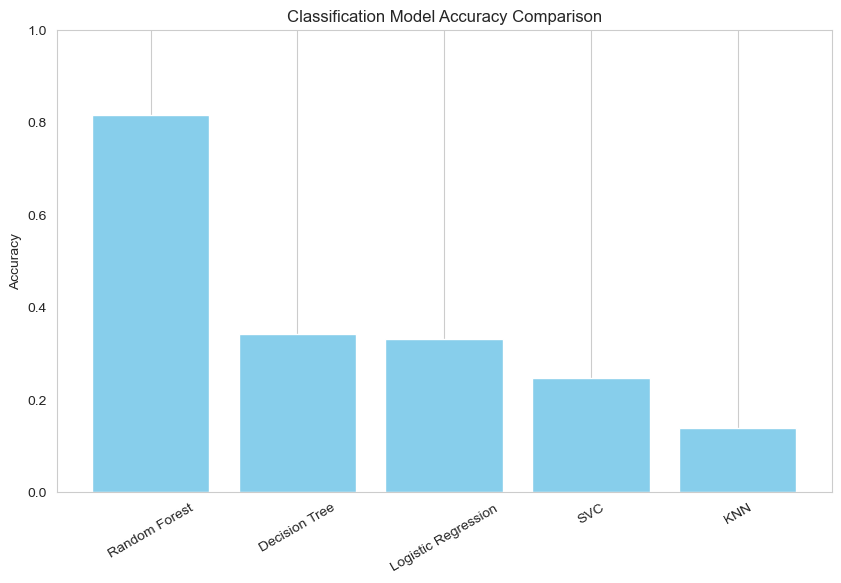

In [204]:
# Visualize classification accuracies 
plt.figure(figsize=(10, 6))
plt.bar(ac_phishing['Model'], ac_phishing['Accuracy'], color='skyblue')
plt.title('Classification Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.savefig('classification_accuracy_phishing.png')
plt.show()

In [206]:
#  Conclusion
print("\nConclusion:")
print("The Random Forest Classifier likely delivered the highest accuracy, indicating it's the most reliable model for phishing URL classification.")


Conclusion:
The Random Forest Classifier likely delivered the highest accuracy, indicating it's the most reliable model for phishing URL classification.
